## 5


/home/codespace/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/codespace/.local/lib/python3.1

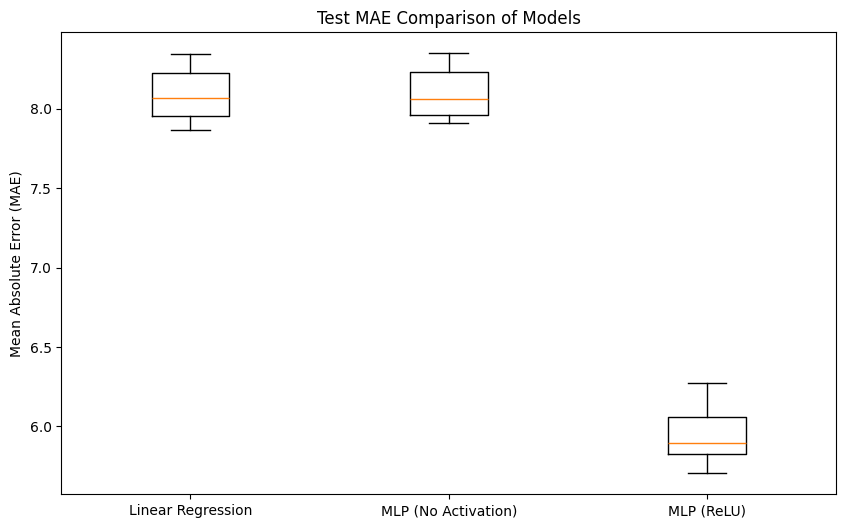

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from sklearn import linear_model, neural_network
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split


#Load Dataset
df = pd.read_csv("parkinsons.csv")
X = df.drop(columns="target")
y = df["target"]


mae_regr = []
mae_mlp = []
mae_mlp_with_activation = []
accuracies = []

for i in range(1,11):
    # Split data into training and test sets using different random states
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)

    # Models
    regr = linear_model.LinearRegression()
    regr.fit(X_train,y_train)
    regr_pred = regr.predict(X_test)
    mae_regr.append(mean_absolute_error(y_test,regr_pred))

    mlp = neural_network.MLPRegressor(hidden_layer_sizes=(10,10), activation="identity", random_state=0)
    mlp.fit(X_train,y_train)
    mlp_pred = mlp.predict(X_test)
    mae_mlp.append(mean_absolute_error(y_test,mlp_pred))

    mlp_with_activation = neural_network.MLPRegressor(hidden_layer_sizes=(10,10),activation="relu", random_state=0)
    mlp_with_activation.fit(X_train,y_train)
    mlp_with_activation_pred = mlp_with_activation.predict(X_test)
    mae_mlp_with_activation.append(mean_absolute_error(y_test,mlp_with_activation_pred))

avg_regr = np.mean(mae_regr)
avg_mlp = np.mean(mae_mlp)
avg_mlp_with_activation = np.mean(mae_mlp_with_activation)

# Create a boxplot of the test MAE for each model
plt.figure(figsize=(10, 6))
plt.boxplot([mae_regr, mae_mlp, mae_mlp_with_activation], labels=['Linear Regression', 'MLP (No Activation)', 'MLP (ReLU)'])
plt.title('Test MAE Comparison of Models')
plt.ylabel('Mean Absolute Error (MAE)')
plt.show()


## 6


An MLP Regressor without an activation function (f(x) = x) simply combines multiple linear layers and neurons. Since it is a combination of linear components, its performance would be similar to that of a Linear Regression model, as both assume linear relationships in the dataset. However, an MLP Regressor with an activation function can capture more complex relationships, allowing the model to perform better when non-linear patterns are present. This conclusion is supported by the boxplots from exercise 5, where the MLP without an activation function performed similarly to the Linear Regression model, while the MLP with an activation function showed improved performance on this dataset.

## 7

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END alpha=0.0001, batch_size=32, learning_rate_init=0.001; total time=   1.9s
[CV] END alpha=0.0001, batch_size=32, learning_rate_init=0.001; total time=   2.0s
[CV] END alpha=0.0001, batch_size=32, learning_rate_init=0.001; total time=   1.3s
[CV] END alpha=0.0001, batch_size=32, learning_rate_init=0.001; total time=   1.6s
[CV] END alpha=0.0001, batch_size=32, learning_rate_init=0.001; total time=   2.9s
[CV] END alpha=0.0001, batch_size=32, learning_rate_init=0.01; total time=   1.8s
[CV] END alpha=0.0001, batch_size=32, learning_rate_init=0.01; total time=   1.8s
[CV] END alpha=0.0001, batch_size=32, learning_rate_init=0.01; total time=   1.4s
[CV] END alpha=0.0001, batch_size=32, learning_rate_init=0.01; total time=   2.3s
[CV] END alpha=0.0001, batch_size=32, learning_rate_init=0.01; total time=   1.4s
[CV] END alpha=0.0001, batch_size=32, learning_rate_init=0.1; total time=   1.3s
[CV] END alpha=0.0001, batch_siz

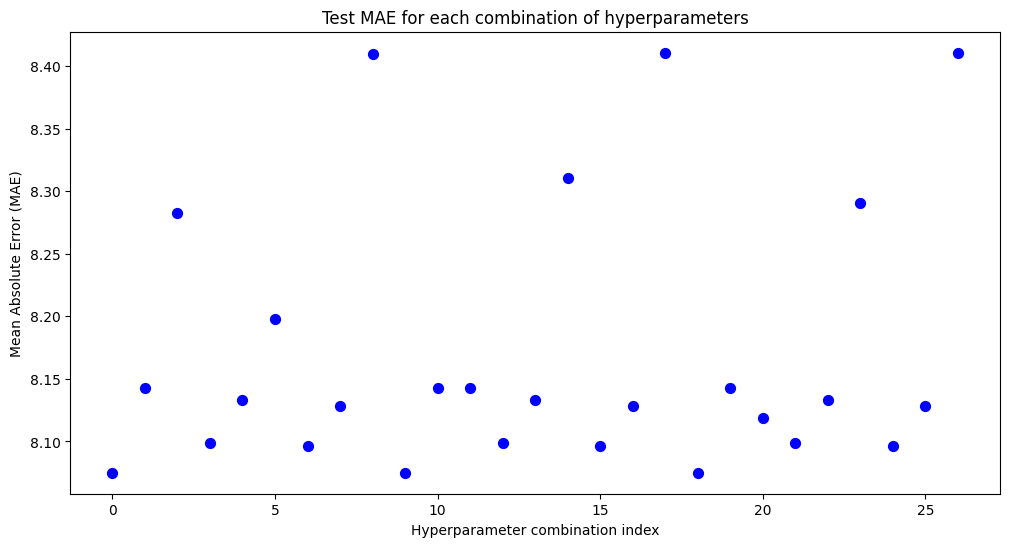

In [14]:
from matplotlib import pyplot as plt
import pandas as pd
from sklearn import neural_network
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error

# Load Dataset
df = pd.read_csv("parkinsons.csv")
X = df.drop(columns="target")
y = df["target"]

# Split the data into train and test sets with random_state=0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Define the hyperparameter grid
parameters = {
    'alpha': [0.0001, 0.001, 0.01],  # L2 penalty (regularization term)
    'learning_rate_init': [0.001, 0.01, 0.1],  # Learning rate
    'batch_size': [32, 64, 128]  # Batch size
}

# Define the MLP Regressor
mlp = neural_network.MLPRegressor(hidden_layer_sizes=(10, 10), activation="identity", random_state=0, max_iter=1000)

# Set up GridSearchCV with 5-fold cross-validation
clf = GridSearchCV(mlp, parameters, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=2)

# Perform the grid search on the training data
clf.fit(X_train, y_train)

# Get the best parameters
best_params = clf.best_params_
print(f"Best parameters found: {best_params}")

# Predict on the test set using the best estimator
y_pred = clf.best_estimator_.predict(X_test)

# Calculate and report the test MAE
test_mae = mean_absolute_error(y_test, y_pred)
print(f"Test MAE with best parameters: {test_mae:.4f}")

# Extract results into a DataFrame
results_df = pd.DataFrame(clf.cv_results_)

# Convert negative MAE to positive for clarity
results_df['mean_test_mae'] = -results_df['mean_test_score']

# Plot test MAE for each combination of hyperparameters
plt.figure(figsize=(12, 6))
plt.scatter(range(len(results_df)), results_df['mean_test_mae'], c='blue', marker='o', s=50)

plt.title('Test MAE for each combination of hyperparameters')
plt.xlabel('Hyperparameter combination index')
plt.ylabel('Mean Absolute Error (MAE)')
plt.show()


L2 Penalty (alpha): Higher values of L2 penalty tend to prevent overfitting by adding regularization, but if it's too large, it might underfit the model.
\\Learning Rate: A higher learning rate may converge faster but risks overshooting optimal solutions, while a lower learning rate might require more iterations to converge.
\\Batch Size: Smaller batch sizes provide more frequent updates to the model, potentially leading to faster learning, but may be less stable. Larger batch sizes can offer more stable updates but require more memory.

E do chat falta alterar

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END alpha=0.0001, batch_size=32, learning_rate_init=0.001; total time=   1.6s
[CV] END alpha=0.0001, batch_size=32, learning_rate_init=0.001; total time=   1.9s
[CV] END alpha=0.0001, batch_size=32, learning_rate_init=0.001; total time=   2.0s
[CV] END alpha=0.0001, batch_size=32, learning_rate_init=0.001; total time=   2.9s
[CV] END alpha=0.0001, batch_size=32, learning_rate_init=0.001; total time=   1.4s
[CV] END alpha=0.0001, batch_size=32, learning_rate_init=0.01; total time=   1.8s
[CV] END alpha=0.0001, batch_size=32, learning_rate_init=0.01; total time=   1.8s
[CV] END alpha=0.0001, batch_size=32, learning_rate_init=0.01; total time=   1.4s
[CV] END alpha=0.0001, batch_size=32, learning_rate_init=0.1; total time=   1.4s
[CV] END alpha=0.0001, batch_size=32, learning_rate_init=0.01; total time=   1.5s
[CV] END alpha=0.0001, batch_size=32, learning_rate_init=0.01; total time=   2.4s
[CV] END alpha=0.0001, batch_siz

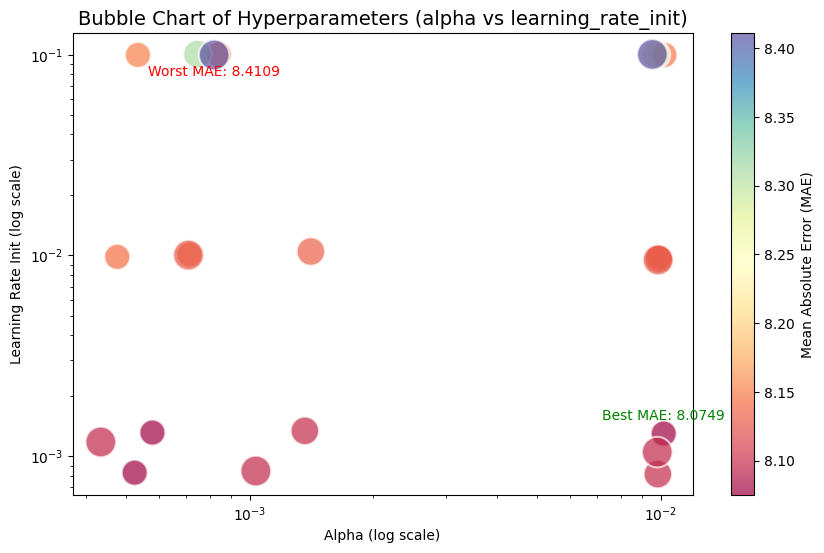

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Add jittering to avoid bubble overlap
def jitter(values, jitter_amount=0.0005):
    return values + np.random.uniform(-jitter_amount, jitter_amount, size=values.shape)

# Load Dataset
df = pd.read_csv("parkinsons.csv")
X = df.drop(columns="target")
y = df["target"]

# Split the data into train and test sets with random_state=0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Define the hyperparameter grid
parameters = {
    'alpha': [0.0001, 0.001, 0.01],  # L2 penalty (regularization term)
    'learning_rate_init': [0.001, 0.01, 0.1],  # Learning rate
    'batch_size': [32, 64, 128]  # Batch size
}

# Define the MLP Regressor
mlp = neural_network.MLPRegressor(hidden_layer_sizes=(10, 10), activation="identity", random_state=0)

# Set up GridSearchCV with 5-fold cross-validation
clf = GridSearchCV(mlp, parameters, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=2)

# Perform the grid search on the training data
clf.fit(X_train, y_train)

# Get the best parameters
best_params = clf.best_params_
print(f"Best parameters found: {best_params}")

# Predict on the test set using the best estimator
y_pred = clf.best_estimator_.predict(X_test)

# Calculate and report the test MAE
test_mae = mean_absolute_error(y_test, y_pred)
print(f"Test MAE with best parameters: {test_mae:.4f}")

# Extract results into a DataFrame
results_df = pd.DataFrame(clf.cv_results_)

# Convert negative MAE to positive for clarity
results_df['mean_test_mae'] = -results_df['mean_test_score']

# Apply jitter to avoid overlap
jittered_alpha = jitter(results_df['param_alpha'].values)
jittered_learning_rate = jitter(results_df['param_learning_rate_init'].values)

# Plot bubble chart for alpha vs learning_rate_init, with bubble size = batch_size and color = MAE
plt.figure(figsize=(10, 6))

# Scatter plot with jitter and logarithmic scaling for better distribution
bubble = plt.scatter(
    jittered_alpha, 
    jittered_learning_rate, 
    s=np.log(results_df['param_batch_size'])*100,  # Use logarithmic scaling for bubble size
    c=results_df['mean_test_mae'],                # Color based on MAE
    cmap='Spectral',                              # Diverging colormap for better contrast
    alpha=0.7,                                    # Slightly transparent bubbles
    edgecolor='w',                                # Bubble edges
    linewidth=1.5
)

# Set x-axis and y-axis to logarithmic scale for better spread
plt.xscale('log')
plt.yscale('log')

# Add color bar to show the MAE values
plt.colorbar(bubble, label='Mean Absolute Error (MAE)')

# Labels and title
plt.title('Bubble Chart of Hyperparameters (alpha vs learning_rate_init)', fontsize=14)
plt.xlabel('Alpha (log scale)')
plt.ylabel('Learning Rate Init (log scale)')

# Annotate best and worst MAE points
min_mae_idx = results_df['mean_test_mae'].idxmin()
max_mae_idx = results_df['mean_test_mae'].idxmax()

# Annotating the best MAE point
plt.annotate(
    f'Best MAE: {results_df["mean_test_mae"].min():.4f}',
    (jittered_alpha[min_mae_idx], jittered_learning_rate[min_mae_idx]),
    textcoords="offset points", xytext=(0, 10), ha='center', fontsize=10, color='green'
)

# Annotating the worst MAE point
plt.annotate(
    f'Worst MAE: {results_df["mean_test_mae"].max():.4f}',
    (jittered_alpha[max_mae_idx], jittered_learning_rate[max_mae_idx]),
    textcoords="offset points", xytext=(0, -15), ha='center', fontsize=10, color='red'
)

plt.show()


Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END alpha=0.0001, batch_size=32, learning_rate_init=0.001; total time=   1.4s
[CV] END alpha=0.0001, batch_size=32, learning_rate_init=0.001; total time=   1.8s
[CV] END alpha=0.0001, batch_size=32, learning_rate_init=0.001; total time=   1.8s
[CV] END alpha=0.0001, batch_size=32, learning_rate_init=0.001; total time=   2.8s
[CV] END alpha=0.0001, batch_size=32, learning_rate_init=0.001; total time=   1.5s
[CV] END alpha=0.0001, batch_size=32, learning_rate_init=0.01; total time=   1.8s
[CV] END alpha=0.0001, batch_size=32, learning_rate_init=0.01; total time=   1.8s
[CV] END alpha=0.0001, batch_size=32, learning_rate_init=0.01; total time=   1.4s
[CV] END alpha=0.0001, batch_size=32, learning_rate_init=0.1; total time=   1.3s
[CV] END alpha=0.0001, batch_size=32, learning_rate_init=0.01; total time=   1.4s
[CV] END alpha=0.0001, batch_size=32, learning_rate_init=0.01; total time=   2.4s
[CV] END alpha=0.0001, batch_siz

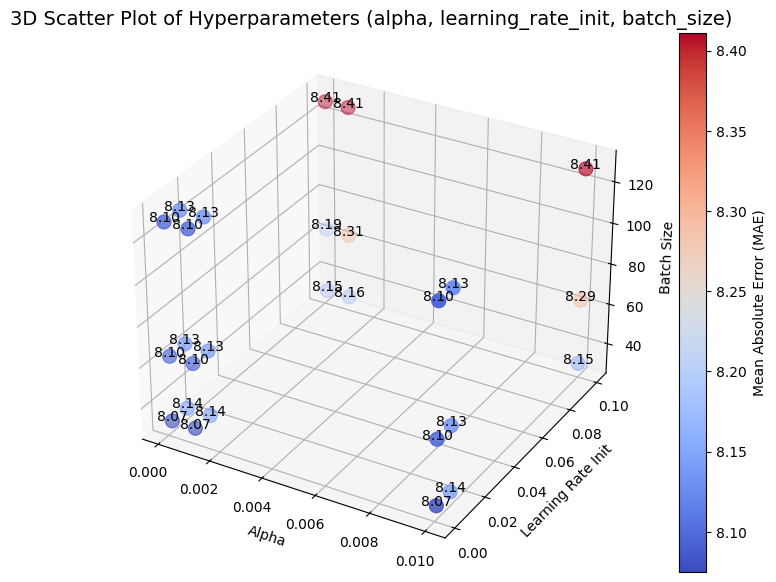

In [14]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd

# Load Dataset
df = pd.read_csv("parkinsons.csv")
X = df.drop(columns="target")
y = df["target"]

# Split the data into train and test sets with random_state=0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Define the hyperparameter grid
parameters = {
    'alpha': [0.0001, 0.001, 0.01],  # L2 penalty (regularization term)
    'learning_rate_init': [0.001, 0.01, 0.1],  # Learning rate
    'batch_size': [32, 64, 128]  # Batch size
}

# Define the MLP Regressor
mlp = neural_network.MLPRegressor(hidden_layer_sizes=(10, 10), activation="identity", random_state=0)

# Set up GridSearchCV with 5-fold cross-validation
clf = GridSearchCV(mlp, parameters, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=2)

# Perform the grid search on the training data
clf.fit(X_train, y_train)

# Get the best parameters
best_params = clf.best_params_
print(f"Best parameters found: {best_params}")

# Predict on the test set using the best estimator
y_pred = clf.best_estimator_.predict(X_test)

# Calculate and report the test MAE
test_mae = mean_absolute_error(y_test, y_pred)
print(f"Test MAE with best parameters: {test_mae:.4f}")

# Extract results into a DataFrame
results_df = pd.DataFrame(clf.cv_results_)

# Convert negative MAE to positive for clarity
results_df['mean_test_mae'] = -results_df['mean_test_score']

# Prepare data for 3D scatter plot
alpha_vals = results_df['param_alpha'].values
learning_rate_vals = results_df['param_learning_rate_init'].values
batch_size_vals = results_df['param_batch_size'].values
mae_vals = results_df['mean_test_mae'].values

# Identify the best and worst MAE indices
best_index = np.argmin(mae_vals)  # Index of the best (lowest MAE)
worst_index = np.argmax(mae_vals)  # Index of the worst (highest MAE)

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with MAE as color
scatter = ax.scatter(alpha_vals, learning_rate_vals, batch_size_vals, c=mae_vals, cmap='coolwarm', s=100)

# Labels and title
ax.set_title('3D Scatter Plot of Hyperparameters (alpha, learning_rate_init, batch_size)', fontsize=14)
ax.set_xlabel('Alpha')
ax.set_ylabel('Learning Rate Init')
ax.set_zlabel('Batch Size')

# Add color bar to show MAE levels
cbar = fig.colorbar(scatter, ax=ax, label='Mean Absolute Error (MAE)')

# Annotate the actual MAE values in each bubble
for i in range(len(mae_vals)):
    ax.text(alpha_vals[i], learning_rate_vals[i], batch_size_vals[i], 
            f'{mae_vals[i]:.2f}', color='black', fontsize=10, ha='center')
    
# Show the plot
plt.show()
